# 1. Preparation

In [1]:
# Import modules
import cv2
import os
import json
import matplotlib.pyplot as plt

# 2. Load JSON


Annotations:  [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}] 

1
1 0.86484375 0.45 0.2671875 0.5166666666666667
File Name (Temp):  cat_dog
File saved successfully!
0
0 0.1609375 0.6041666666666666 0.3125 0.44583333333333336
File Name (Temp):  cat_dog
File saved successfully!


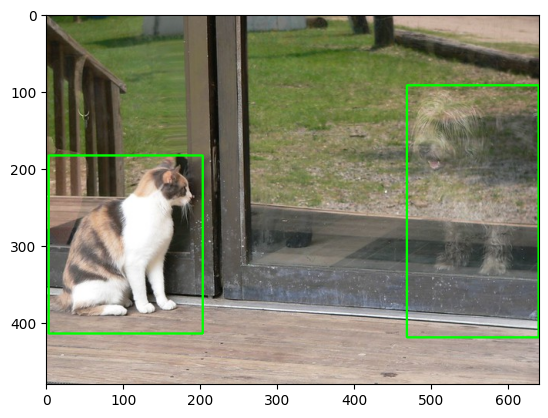

In [37]:
# Set a path
json_path = './data/cat_dog_annotation_json.json'

# Load a json file
with open(json_path, 'r', encoding='utf-8') as f:
    json_data = json.load(f)
    #print(json_data)
    
# Define variables
categories_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']
#print('Categories: ', categories_info)
#print('\nImage: ', images_info)
print('\nAnnotations: ', annotations_info,'\n')


# Set labels in dictionary format
label_dict = {1: 0, 2: 1}  # 0: cat, 1: dog


# Get detailed image info
for image_json in images_info:
    #print(image_json)
    
    ################
    # Get image info
    image_id = image_json['id']
    image_name = image_json['file_name']
    image_width = image_json['width']
    image_height = image_json['height']
    #print(f'Name of the image: {image_name}(ID: {image_id})')
    #print(f'Size of image: {image_width}x{image_height}')
    
    ################
    # Set an image path
    image_path = os.path.join('./data/', image_name)
    #print(image_path)
    
    
    ################
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #print(image)
    
    
    ################
    # Get a bounding box info
    for anno_json in annotations_info:
        if image_id == anno_json['image_id']:
            bbox = anno_json['bbox']
            #print('Bounding Box: ', bbox)  # x, y, w, h
            
            ################
            # Change type from 'float' to 'int'
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            #print(x, y, w, h)
            
            
            ################
            # Get label info
            category_id = anno_json['category_id']
            label_number = label_dict[category_id]
            print(label_number)
            
            
            ################
            # Change format of 'xywh' to 'YOLO' style (centerX, centerY, w, h)
            center_x = ((2 * x + w) / (2 * image_width))
            center_y = ((2 * y + h) / (2 * image_height))
            yolo_w = w / image_width
            yolo_h = h / image_height
            print(label_number, center_x, center_y, yolo_w, yolo_h)
            
            
            ################
            # Set a file name
            file_name_temp = image_name.replace(".png", "")
            print('File Name (Temp): ', file_name_temp)
        
        ################
        # Export label info as a text file
        with open(f'./data/{file_name_temp}.txt', 'a') as f:   #'a': append
            f.write(f'{label_number} {center_x} {center_y} {yolo_w} {yolo_h}')
            print('File saved successfully!')
            
            # Draw a rectangle of labels
            cv2.rectangle(image, 
                         (x, y),
                         (x+w, w+h),
                         (0, 255, 0),
                         2)
   
    plt.imshow(image)
    plt.show()
        
    
    